In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense


from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

plt.style.use('dark_background')

%matplotlib inline

In [36]:
df = pd.read_csv('./data/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


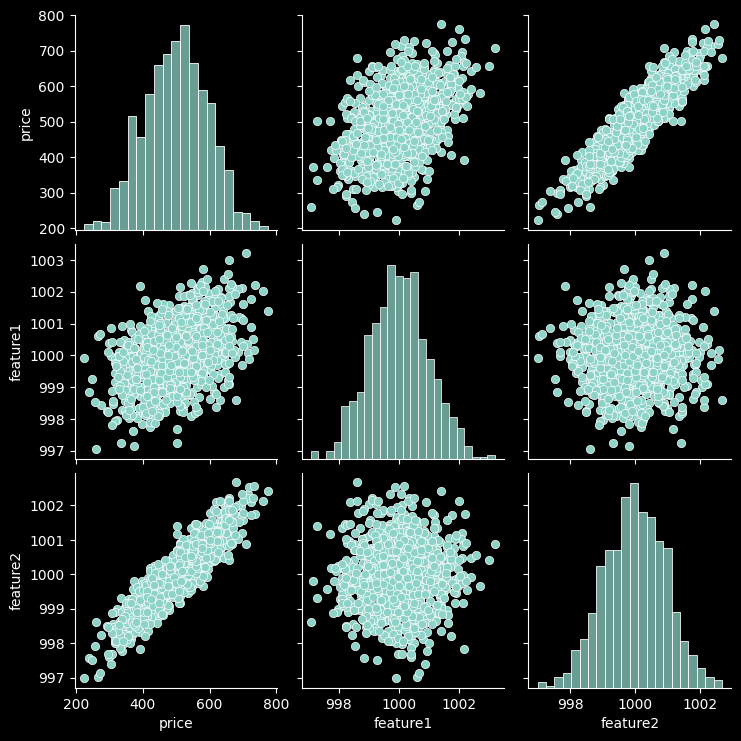

In [37]:
sns.pairplot(df)

In [38]:
X = df[['feature1', 'feature2']].values
Y = df['price'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [39]:
x_train.shape

(700, 2)

In [40]:
x_test.shape

(300, 2)

In [41]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit(x_train, y_train, epochs=250, verbose=1)

Epoch 1/250


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 256798.1562   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257772.1875 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 263429.4688
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 262426.2188
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 261752.1406
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 262084.3281 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 260725.5156
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 260807.1406
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 262468.7812 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255022.7500 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 256168.7031
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 263576.0938 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258607.0625 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2556

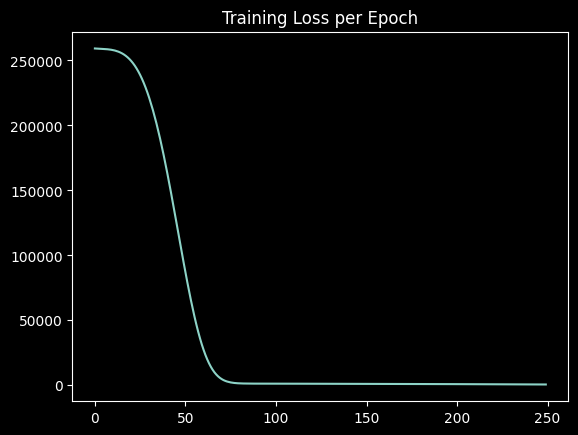

In [44]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [45]:
model.evaluate(x_test, y_test, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 644.3696 


677.7515258789062

In [46]:
model.evaluate(x_train, y_train, verbose=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 597.9018


633.28515625

In [47]:
predictions = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

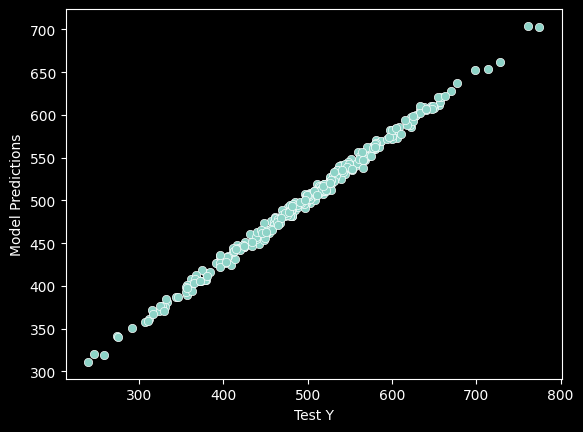

In [48]:
predictions = pd.Series(predictions.reshape(300,))

pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df = pd.concat([pred_df, predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [49]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

20.464423021241448

In [50]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

677.7515110109852

In [52]:
model.save('./saved_models/keras_syntax_basics.keras')

# later_model = load_model('./saved_models/keras_syntax_basics.keras')
# later_model.predict(new_data)